## Data Warehouse - Semester Project
**Blood Banks - Data Warehouse**

------

**Connection**
Connect *SQL Server*  with  *Jupyter Notebook*

In [76]:
import pyodbc
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [77]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-LF6ARI5;'
                      'Database=GlobalBloodBank;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
print('Connected!')

Connected!


### Query 2

In [78]:
query2= pd.read_sql_query('SELECT COUNT(F.bloodtype_id) as RequiredBlood, B.name as Name\
                            FROM fact_table F JOIN bloodtype B on F.bloodtype_id = B.bloodtype_id, Ailment A \
                            WHERE F.ailment_id = A.ailment_id \
                            GROUP BY F.bloodtype_id, B.name \
                            ORDER BY RequiredBlood DESC', \
                            conn)

**Table**

In [79]:
query2.head()

,RequiredBlood,Name
0,257,Fresh Frozen Plasma
1,255,Red Cells Concentration
2,246,Platelets
3,242,Whole Blood


**Visualization**

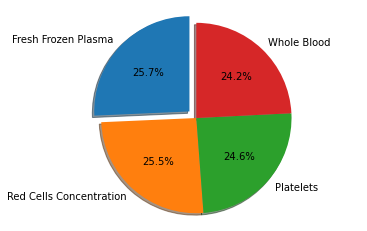

In [80]:
labels = list(query2['Name'])
sizes = list(query2['RequiredBlood'])
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Query 3

In [81]:
query3= pd.read_sql_query('SELECT G.gender, B.name as Name, COUNT(F.bloodtype_id) as RequiredBlood, B.Code as Code \
                            FROM fact_table F JOIN gender G on F.gender_id = G.gender_id \
                            Join bloodtype B on B.bloodtype_id = F.bloodtype_id, Ailment A \
                            WHERE F.ailment_id = A.ailment_id \
                            GROUP BY B.name, G.gender, B.code ORDER BY RequiredBlood DESC', \
                            conn)

**Table**

In [82]:
query3.head()

,gender,Name,RequiredBlood,Code
0,Male,Platelets,96,PLT
1,Other,Red Cells Concentration,96,RCC
2,Female,Fresh Frozen Plasma,88,FFP
3,Other,Fresh Frozen Plasma,88,FFP
4,Male,Whole Blood,86,WB


**Visualization**

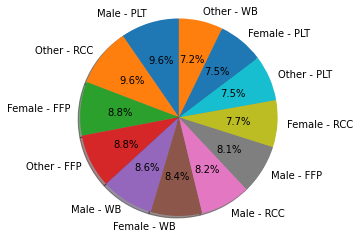

In [83]:
count = len(list(query3['gender']))
labels_list = []
for x in range (count):
    labels_list.append(list(query3['gender'])[x] +' - '+ list(query3['Code'])[x])

sizes = list(query3['RequiredBlood'])
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()